In [1]:
import pandas as pd
#reading the data
train = pd.read_csv("adult.data",
                 names=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
test = pd.read_csv("adult.test",skiprows=1,
                 names=['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])
df = train.append(test,ignore_index=True)

In [2]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
(df['income'].dtype == "object" ) & (df['income'].name != 'income')

False

In [5]:
#removing extra whitespace
df = df.apply(lambda x:x.str.strip() if (x.dtype == "object") & (x.name != "income") else x )


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#o/p column unique values
df.income.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [8]:
#df['income'] = df['income'].astype(str)
#df[df.income == ' <=50K.'] = ' <=50K'
#df[df.income == ' >50K.'] = ' >50K'

In [9]:
 #df['income'][df.income == '<=50K.'] = '<=50K'

In [10]:
#o/p column unique values
df.income.value_counts(dropna=False)

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [11]:
# <=50K and <=50K. are one and the same (same with > case), so reforming
#df['income'] = df['income'].map({'<=50K':0,'<=50K.':0,'>50K':1,'>50K.':1})
df['income'] = df['income'].astype(str)
df['income']=df['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
#o/p column unique values
df.income.value_counts(dropna=False)

0    37155
1    11687
Name: income, dtype: int64

In [12]:
#Replacing "?" with nan
import numpy as np
df[df == '?'] = np.nan

C:\Users\abanthiy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
df.workclass.value_counts(dropna=False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
df['native-country'].value_counts(dropna=False)

United-States                 43832
Mexico                          951
NaN                             857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [15]:
df.occupation.value_counts(dropna=False)

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NaN                  2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [16]:
#As occupation,native-country and workclass columns are having nan values, replacing NaN with the mode
for col in ['occupation','native-country','workclass'] :
    df[col].fillna(df[col].mode()[0],inplace =True)

    

In [17]:

# Confirm All Missing Data is Handled
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
df['education'] = df['education'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        48842 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null int64
dtypes: category(7), int64(7), object(1)
memory usage: 3.3+ MB


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from collections import Counter

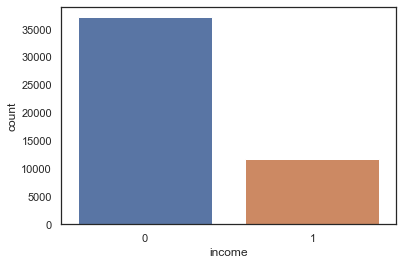

'People with income less than 50k are higher'

In [20]:

sns.set(style='white', context='notebook', palette='deep')

# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

# Count of >50K & <=50K
sns.countplot(df['income'],label="Count")
plt.show()
'''People with income less than 50k are higher'''

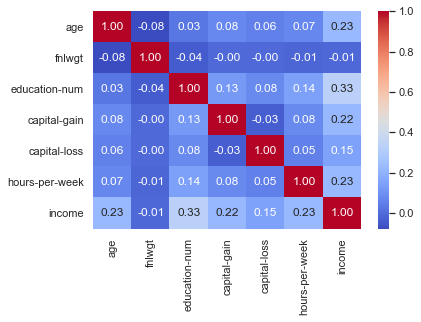

In [21]:
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

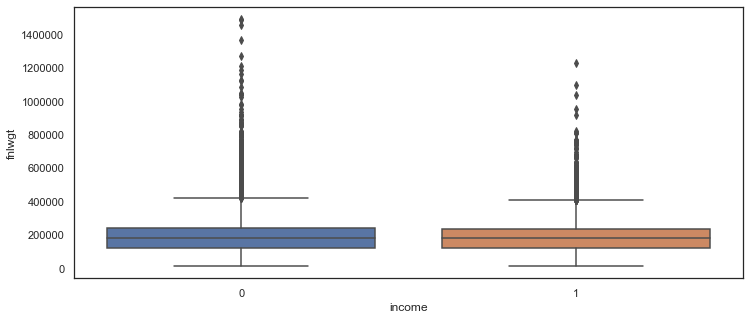

' weight has no significance on income'

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='income',y='fnlwgt',data=df)
plt.show()

''' weight has no significance on income'''

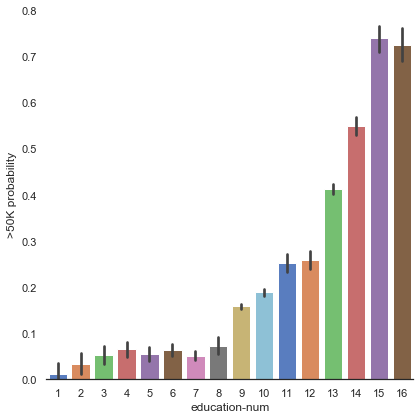

In [183]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

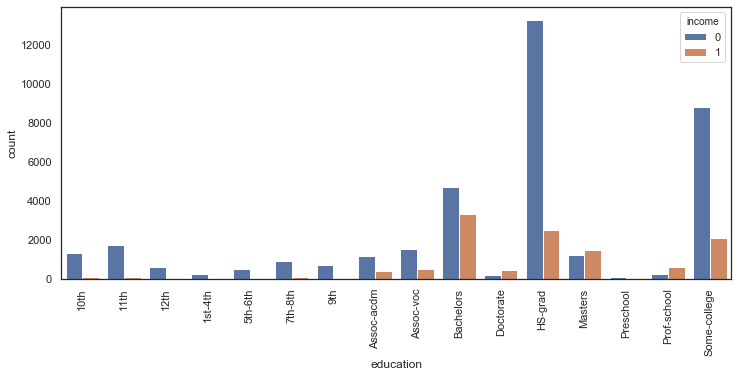

' higher education have better chance of earning >50k'

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='education',hue='income',data=df)
plt.xticks(rotation = 90)
plt.show()

''' higher education have better chance of earning >50k'''

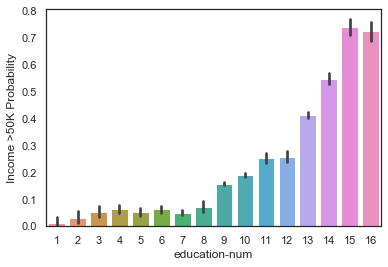

In [193]:


#g = sns.barplot(x="education-num",y="income",data=df)
#g = g.set_ylabel("Income >50K Probability")
#plt.show()

C:\Users\abanthiy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abanthiy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


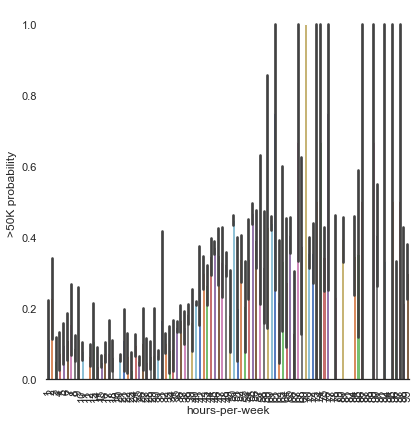

In [57]:
# Explore Hours Per Week vs Income
g = sns.factorplot(x="hours-per-week",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
plt.xticks(rotation = 90)
g = g.set_ylabels(">50K probability")

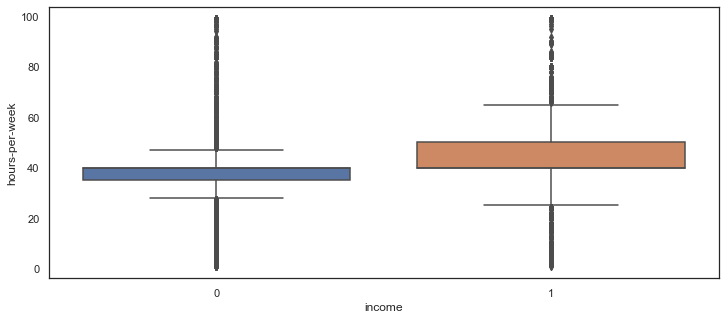

' income >50k have longer avg working hrs than <50k working hr, range is also higher'

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.show()

''' income >50k have longer avg working hrs than <50k working hr, range is also higher'''

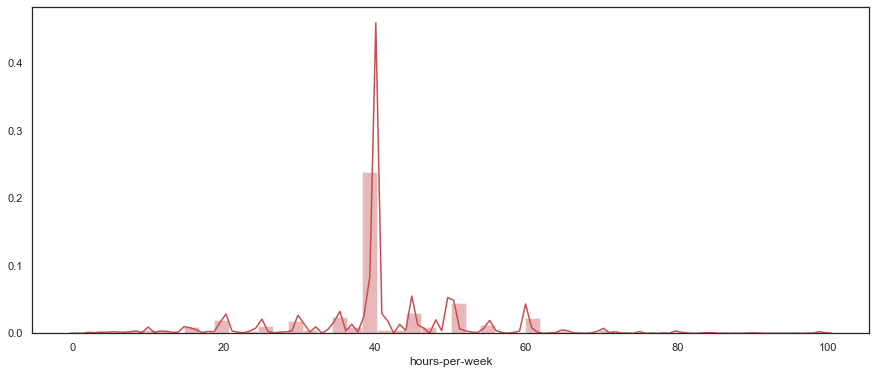

'Avg population spend 40  to 50 hr/week'

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(df['hours-per-week'],kde=True,color='r')
plt.show()
'''Avg population spend 40  to 50 hr/week'''

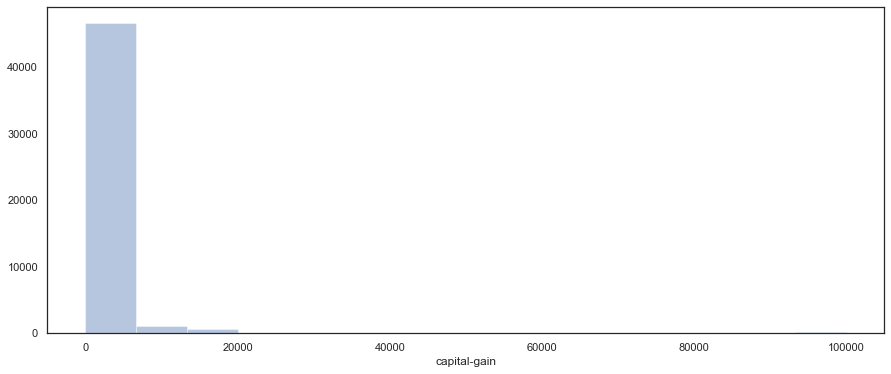

'capital-gain column is havin high deviation. Eigher high gain or no gain'

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(df['capital-gain'],kde=False,color='b',bins=15)
plt.show()
'''capital-gain column is havin high deviation. Eigher high gain or no gain'''



              capital-gain  capital-loss
capital-gain      1.000000     -0.031441
capital-loss     -0.031441      1.000000
-0.03144077064746344


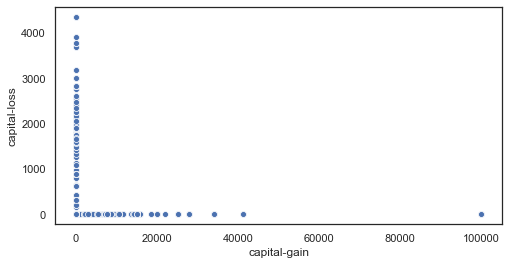

'capital gain and loss have negative weak relationship.f one is 0 ,another is high'

In [32]:
print(df[['capital-gain','capital-loss']].corr())
print(df['capital-gain'].corr(df['capital-loss']))
plt.figure(figsize=(8,4))
sns.scatterplot(df['capital-gain'],df['capital-loss'])
plt.show()
'''capital gain and loss have negative weak relationship.f one is 0 ,another is high'''

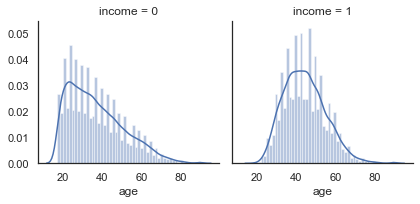

In [33]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

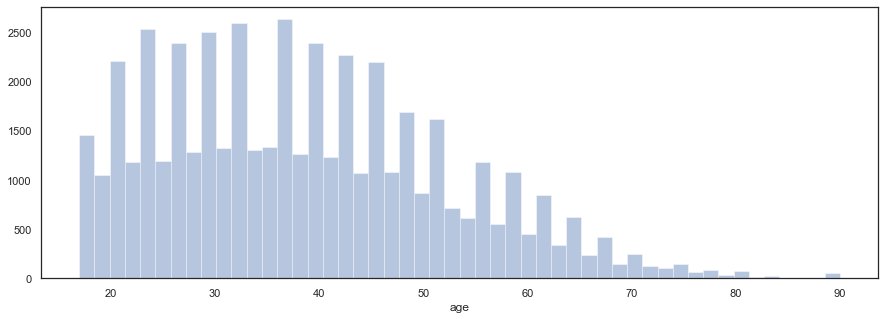

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df['age'],kde=False)
plt.show()

In [35]:
print((df.age>70).sum())
print(df.shape)
'''Age is rightly skewed,but it is small number (868<<48842), so we can ignore. The age is rightly skewed mainly due to datapoints which corresponds to income < 50k '''

868
(48842, 15)


'Age is rightly skewed,but it is small number (868<<48842), so we can ignore. The age is rightly skewed mainly due to datapoints which corresponds to income < 50k '

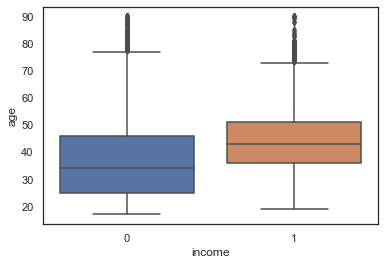

"\navg people's age is 44 approx. for income > 50k which is more compared to income <= 50k\n"

In [49]:
sns.boxplot(x='income',y='age',data=df)
plt.show()
'''
avg people's age is 44 approx. for income > 50k which is more compared to income <= 50k
'''

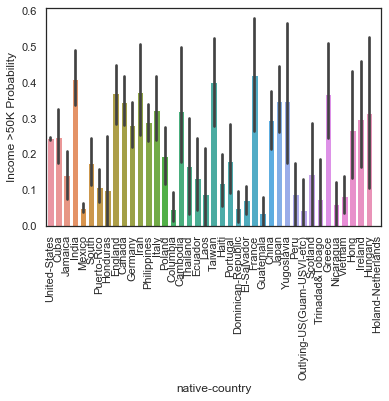

In [36]:
# Explore Native Nation vs Income
g = sns.barplot(x="native-country",y="income",data=df)
plt.xticks(rotation = 90)
g = g.set_ylabel("Income >50K Probability")
plt.show()

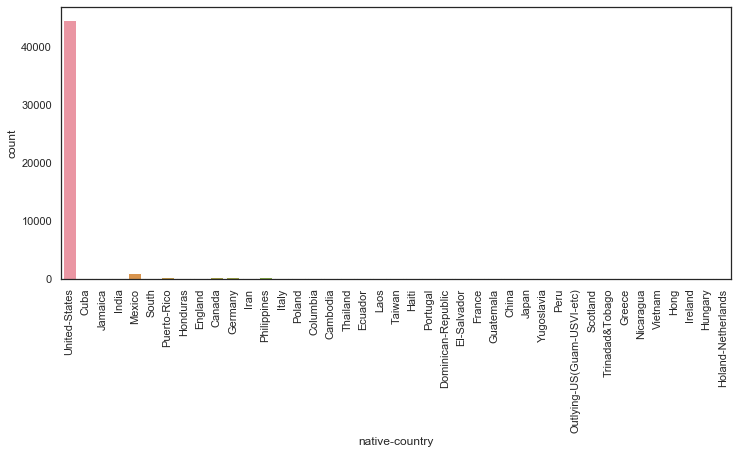

'\nUS have highest frequency, that means data is of country US.\n'

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(df['native-country'])
plt.xticks(rotation = 90)
plt.show()
'''
US have highest frequency, that means data is of country US.
'''

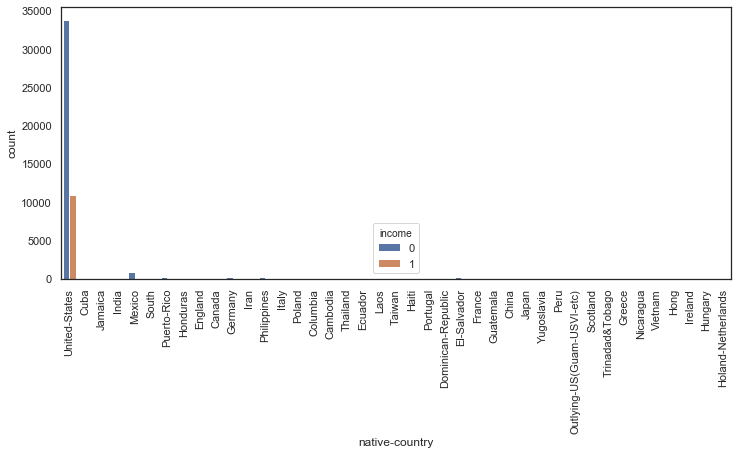

'country has negligible effect on income'

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='native-country',hue='income',data=df)
plt.xticks(rotation = 90)
plt.show()
'''country has negligible effect on income'''

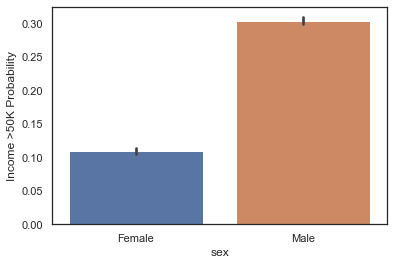

'\nmales are in majority\n'

In [39]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()
'''
males are in majority
'''


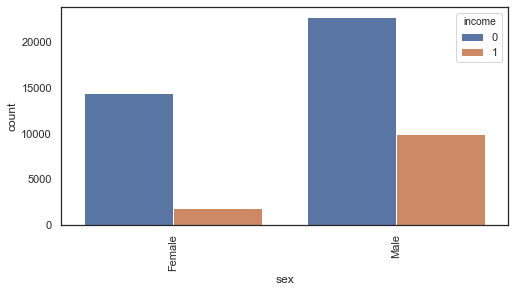

' females are more likely to be earning <= 50k'

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x='sex',hue='income',data=df)
plt.xticks(rotation = 90)
plt.show()

''' females are more likely to be earning <= 50k'''

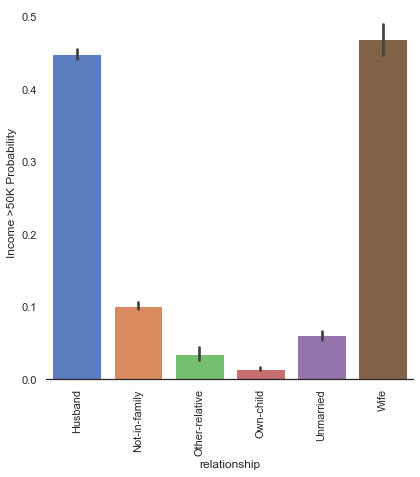

In [41]:

# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
plt.xticks(rotation = 90)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

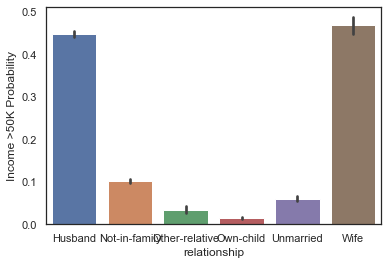

In [198]:
# Explore relationship vs Income
#g = sns.barplot(x="relationship",y="income",data=df)
#g = g.set_ylabel("Income >50K Probability")
#plt.show()

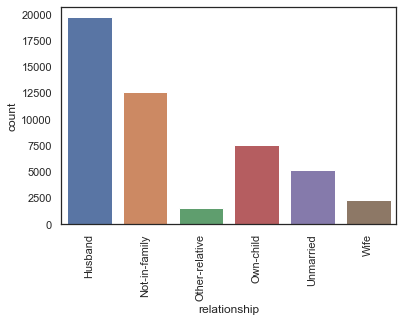

'\nhusband have highest frequency\n'

In [42]:
sns.countplot(df['relationship'])
plt.xticks(rotation = 90)
plt.show()

'''
husband have highest frequency
'''

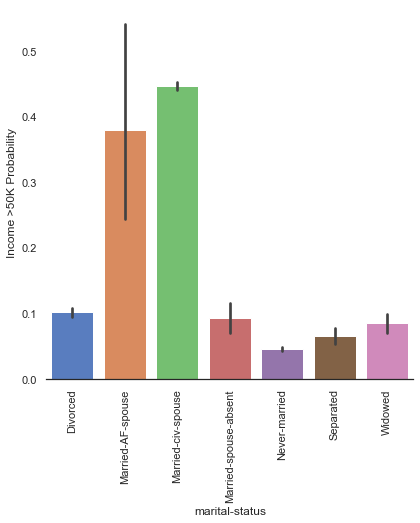

In [44]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
plt.xticks(rotation = 90)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

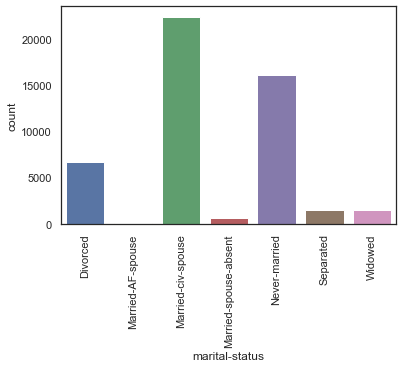

'majority is married with civilian spouse followed by never married.'

In [43]:
sns.countplot(df['marital-status'])
plt.xticks(rotation = 90)
plt.show()
'''majority is married with civilian spouse followed by never married.'''

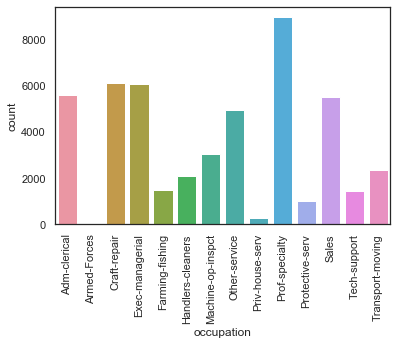

'Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.\nArmed-Forces has minimum samples in the occupation attribute.'

In [45]:
sns.countplot(df['occupation'])
plt.xticks(rotation = 90)
plt.show()
'''Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces has minimum samples in the occupation attribute.'''

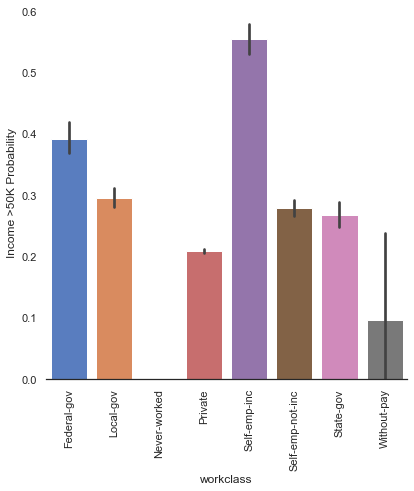

In [46]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=df,kind="bar", size = 6 ,
palette = "muted")
plt.xticks(rotation = 90)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

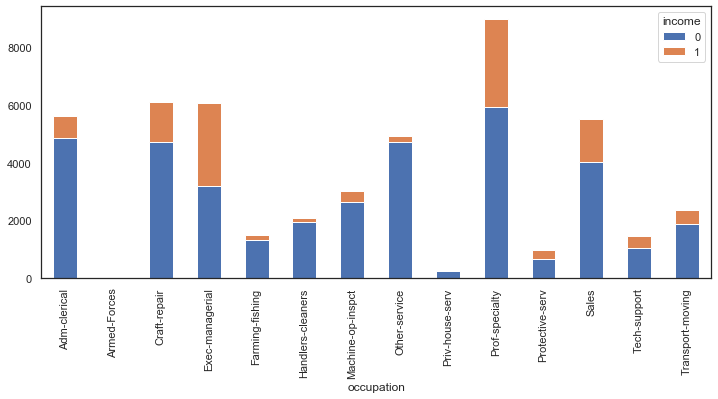

' In every occupation, people who earn less than 50k is greater than people who earn >50k.\n'

In [51]:
dd = pd.crosstab(df['occupation'],df['income'])
dd.plot.bar(stacked=True,figsize=(12,5))
plt.xticks(rotation = 90)
plt.show()

''' In every occupation, people who earn less than 50k is greater than people who earn >50k.
'''

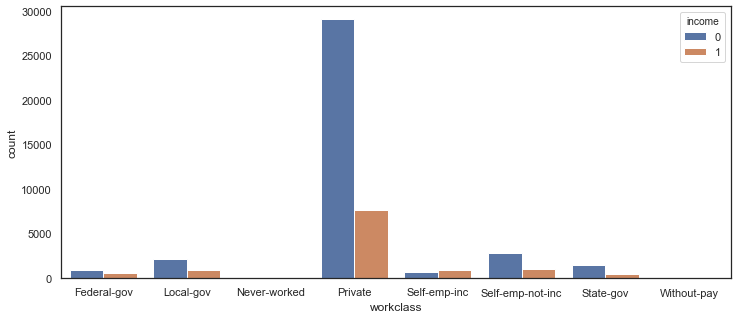

' private working class have highest no. of people >50k\nhowever conversion ratio is minimal in private while in self-emp-inc have very high conversion ratio'

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x='workclass',hue='income',data=df)
plt.show()
''' private working class have highest no. of people >50k
however conversion ratio is minimal in private while in self-emp-inc have very high conversion ratio'''

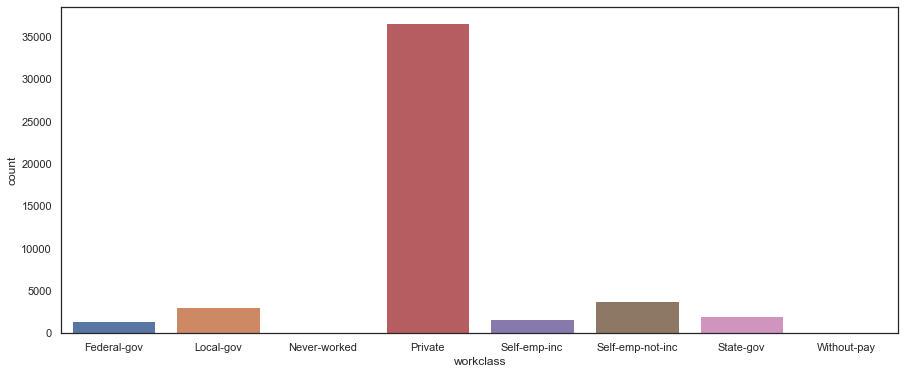

'most people working in private sector.Huge imbalance in data.'

In [48]:
plt.figure(figsize=(15,6))
#Show the counts of observations in each categorical bin using bars.
sns.countplot(df['workclass'])
plt.show()
'''most people working in private sector.Huge imbalance in data.'''

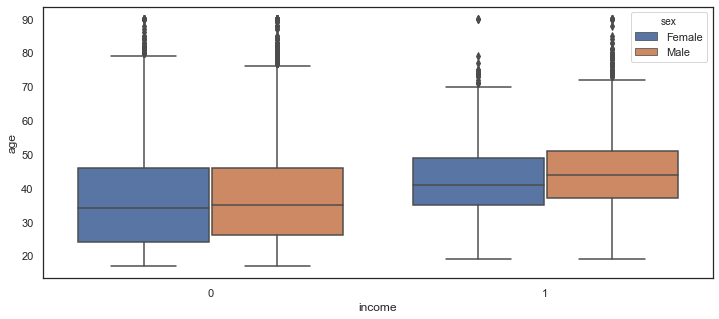

'average age of female is less compared to males for income group >50k.\nHowever range is less for men compared to females for group <=50k. '

In [50]:
plt.figure(figsize=(12,5))
sns.boxplot(df['income'],df['age'],hue=df['sex'])
plt.show()
'''average age of female is less compared to males for income group >50k.
However range is less for men compared to females for group <=50k. '''

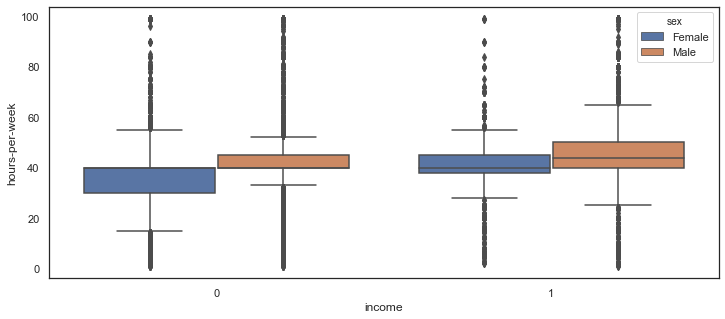

'average working hour of female is less compared to males.\nHowever for income group >50k mens have more flexible\nworking hrs compared to females. '

In [52]:
plt.figure(figsize=(12,5))
sns.boxplot(df['income'],df['hours-per-week'],hue=df['sex'])
plt.show()
'''average working hour of female is less compared to males.
However for income group >50k mens have more flexible
working hrs compared to females. '''

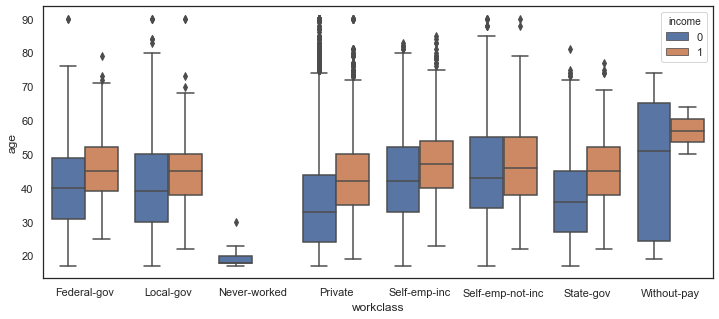

'average age of private and gov dept is less for income group <=50k compared to group >50k. '

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(df['workclass'],df['age'],hue=df['income'])
plt.show()
'''average age of private and gov dept is less for income group <=50k compared to group >50k. '''


In [56]:
#Conclusion
'''1.People with income less than 50k are higher.
   2.Average people's age is 44(approx.) for income > 50k which is more compared to income <= 50k. 
   3.Weight and native-country has no significance on income.
   4.Private working class have highest no. of people >50k.However conversion ratio is minimal in private while in self-emp-inc have very high conversion ratio. 
   5.Higher education have better chance of earning >50k.
   6.Females are more likely to be earning <= 50k.
   7.In every occupation, people who earn less than 50k is greater than people who earn >50k.
   8.Average working hour of female is less compared to males.However for income group >50k mens have more flexible working hrs compared to females. 
   9.Average age of private and gov dept is less for income group <=50k compared to group >50k.'''

"1.People with income less than 50k are higher.\n   2.Average people's age is 44(approx.) for income > 50k which is more compared to income <= 50k. \n   3.Weight and native-country has no significance on income.\n   4.Private working class have highest no. of people >50k.However conversion ratio is minimal in private while in self-emp-inc have very high conversion ratio. \n   5.Higher education have better chance of earning >50k.\n   6.Females are more likely to be earning <= 50k.\n   7.In every occupation, people who earn less than 50k is greater than people who earn >50k.\n   8.Average working hour of female is less compared to males.However for income group >50k mens have more flexible working hrs compared to females. \n   9.Average age of private and gov dept is less for income group <=50k compared to group >50k."